In [1]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [2]:
import pandas as pd

In [3]:
# Importando o relatório de vendas e atualizando as colunas de pedido e envio para o tipo data
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")

vendas["data_pedido"] = pd.to_datetime(vendas["data_pedido"], format="%Y-%m-%d") #tipo e formato
vendas["data_envio"] = pd.to_datetime(vendas["data_envio"], format="%Y-%m-%d") #tipo e formato

vendas

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,2018-09-30,2018-10-04,Entrega padrão,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sudeste,Automotivo,ferramentas automotivas,97.34,123.22,0.000,123.22,1,123.22,25.88
8936,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,ferramentas automotivas,223.01,271.97,0.000,271.97,1,271.97,48.96
8937,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,pneus,121.23,140.15,0.000,140.15,5,700.75,94.60
8938,2016-01-22,2016-01-24,Econômica,Isabel Araújo,B2C,João Pessoa,Paraíba,Nordeste,Materiais de construção,iluminação,26.29,31.79,0.100,28.61,3,85.83,6.96


In [4]:
# Verificando os tipos de dados e se existem dados nulos
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pedido          8940 non-null   datetime64[ns]
 1   data_envio           8940 non-null   datetime64[ns]
 2   modo_envio           8940 non-null   object        
 3   nome_cliente         8940 non-null   object        
 4   segmento_cliente     8940 non-null   object        
 5   cidade               8940 non-null   object        
 6   estado               8940 non-null   object        
 7   regiao               8940 non-null   object        
 8   departamento         8940 non-null   object        
 9   tipo_produto         8940 non-null   object        
 10  preco_base           8940 non-null   float64       
 11  preco_unit_sem_desc  8940 non-null   float64       
 12  desconto             8940 non-null   float64       
 13  preco_unit_venda     8940 non-nul

In [5]:
# Criando um df com os dados desejados
df_vendas_ano = vendas.copy()
df_vendas_ano = df_vendas_ano[["data_pedido", "vendas"]]

# Gerando uma coluna que represente apenas os anos puxando-os da coluna data pedido e agrupando os dados por ano
df_vendas_ano["ano"] = df_vendas_ano.data_pedido.dt.year
df_vendas_ano.drop(labels="data_pedido", axis= 1, inplace=True)

#Agrupando dados por ano
df_vendas_ano = df_vendas_ano.groupby(["ano"]).aggregate("sum")

df_vendas_ano

,vendas
ano,
2016,1402652.33
2017,1489179.52
2018,1884161.41
2019,2305006.29


*Criando grafico

C:\Users\Cr0l3y\AppData\Local\Temp\ipykernel_25224\3317140432.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data= df_vendas_ano, x= df_vendas_ano.index, y="vendas", palette=cores) #passou o index pq a coluna virou indeci
C:\Users\Cr0l3y\AppData\Local\Temp\ipykernel_25224\3317140432.py:12: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data= df_vendas_ano, x= df_vendas_ano.index, y="vendas", palette=cores) #passou o index pq a coluna virou indeci


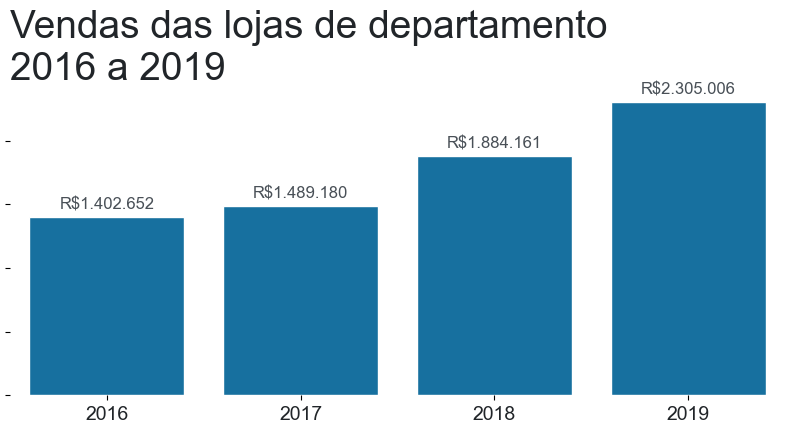

In [6]:
## Gerando a função para criar o gráfico de colunas
def grafico_vendas(cores: list= [AZUL2]):
    # Importando as bibliotecas
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Área do gráfico e tema da visualização
    fig, ax = plt.subplots(figsize=(10,4)) #Ax eixo
    sns.set_theme(style="white")  #estelização

    # Gerando o gráfico de colunas 
    ax = sns.barplot(data= df_vendas_ano, x= df_vendas_ano.index, y="vendas", palette=cores) #passou o index pq a coluna virou indeci

    # Personalizando o gráfico
    ax.set_title("Vendas das lojas de departamento\n2016 a 2019", loc="left", fontsize=28, color = CINZA1)
    ax.set_xlabel("")
    ax.set_ylabel("")

    ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA1)   #Aumentar o X
    #Remover as bordas topo e lado direito e vai passar mais 2 parametros para tirardo lado esquerdo e embaixo left e bottom
    sns.despine(left=True, bottom=True)

    #Retirar os label do y e passar o test
    ax.set_yticklabels([]) #Pegar tamanho da coluna e colocar em cima em cada um processo iterado usamos o for
    for i, valor in enumerate(df_vendas_ano["vendas"]):
        qtd = f'R${valor:,.0f}'.replace(",", ".") #Testo que vai ser escrito em xima
    #meu valor tenha separação de milhar por virgula separação decimal por ponto e retirar o ponto decimal :,.
        offset = 1e5
        ax.text(i, valor + offset, qtd, color = CINZA2, fontsize=12, ha= "center", va = "center") #Alinhamento horizontal e vestical

# retornando o eixo 
    return ax

# chamando a função
ax = grafico_vendas()

C:\Users\Cr0l3y\AppData\Local\Temp\ipykernel_25224\3317140432.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data= df_vendas_ano, x= df_vendas_ano.index, y="vendas", palette=cores) #passou o index pq a coluna virou indeci
C:\Users\Cr0l3y\AppData\Local\Temp\ipykernel_25224\3317140432.py:12: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data= df_vendas_ano, x= df_vendas_ano.index, y="vendas", palette=cores) #passou o index pq a coluna virou indeci


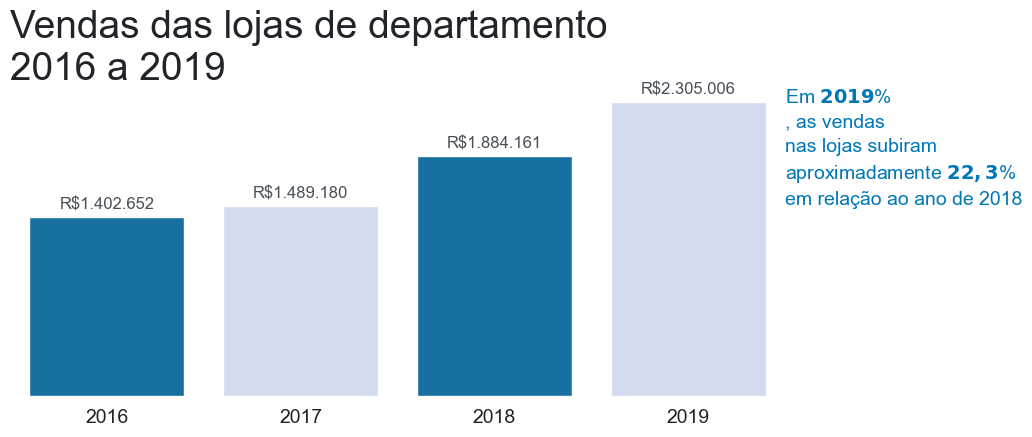

In [7]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

#criar um for para ler cada um das colunas por anos
cores = []
for ano in df_vendas_ano.index:
    if df_vendas_ano.loc[ano,"vendas"]== df_vendas_ano.vendas.max():
        cores.append(AZUL2)
else:
    cores.append(AZUL5)

# Definindo as cores do gráfico
ax = grafico_vendas(cores)

## Chamando a função do gráfico de colunas, anotando uma conclusão no gráfico

ax.text(3.5, 1.5e6,
        'Em $\\bf{2019}$%\n, as vendas\n'
        'nas lojas subiram\n'
        'aproximadamente $\\bf{22,3}$%\n'
        'em relação ao ano de 2018',
        fontsize=14, linespacing=1.45, color=AZUL2)
fig=ax.get_figure()


In [8]:
# Criando um df com os dados desejados
top_lucro = vendas.copy()
top_lucro = top_lucro[["tipo_produto", "lucro"]]
# Agrupando os dados por tipo_produto, ordenando de maneira crescente pelo lucro e selecionando os 7 primeiros
top_lucro = top_lucro.groupby(["tipo_produto"]).agg("sum").sort_values("lucro", ascending=False)

top_7 = top_lucro[:7]
top_7

,lucro
tipo_produto,
peças de reposição,91148.67
pneus,67460.05
ferramentas automotivas,63330.22
pesticidas,53343.89
ferramentas de jardinagem,53202.88
ferramentas,41020.34
vasos,33941.85


C:\Users\Cr0l3y\AppData\Local\Temp\ipykernel_25224\395572521.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data=top_7, x="lucro", y= top_7.index, palette=cores)


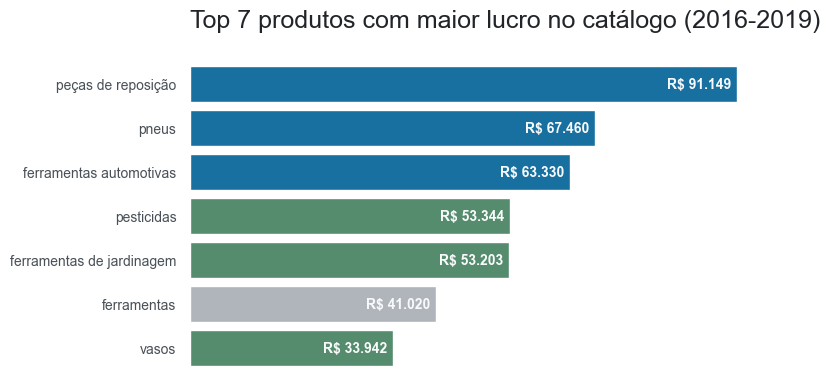

In [9]:
## Gerando a função para criar o gráfico de barras

def grafico_top_7():
  # Importando as bibliotecas
  import matplotlib.pyplot as plt
  import seaborn as sns

  # Área do gráfico e tema da visualização
  fig, ax = plt.subplots(figsize=(10,4))
  fig.subplots_adjust(right=0.7)

  sns.set_theme(style="white")

  # Definindo as cores do gráfico
  cores = [AZUL2, AZUL2, AZUL2, VERDE1, VERDE1, CINZA3, VERDE1]

  # Gerando o gráfico de colunas 
  ax= sns.barplot(data=top_7, x="lucro", y= top_7.index, palette=cores)

  # Personalizando o gráfico
  ax.set_title('Top 7 produtos com maior lucro no catálogo (2016-2019)\n', fontsize=18, color=CINZA1, loc='left')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_xticklabels([])
  ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
  sns.despine(left = True, bottom = True)

  # Escrevendo os valores de cada barra no gráfico
  for i, valor in enumerate(top_7['lucro']):
      qtd = f'R$ {valor:,.0f}'.replace(',','.')  
      offset = 1e3  # offset de 1.000
      ax.text(valor - offset, i, qtd, color= CINZA5, fontsize=10, fontweight='bold', ha='right', va='center')

  return ax

ax = grafico_top_7()

*Agrupamento de dados*

In [10]:
#Criando um df com dados desejados
df_vendas_reg = vendas.copy()
df_vendas_reg = df_vendas_reg[["data_pedido", "regiao", "vendas"]]

#Gerando um coluna que apresenta apenas os anos da coluna data pedido
df_vendas_reg['ano'] = df_vendas_reg.data_pedido.dt.year
df_vendas_reg.drop(labels="data_pedido", axis= 1, inplace=True)

df_vendas_reg

,regiao,vendas,ano
0,Sudeste,890.66,2018
1,Sudeste,2488.59,2018
2,Sudeste,49.72,2018
3,Sul,3255.75,2017
4,Sul,76.04,2017
...,...,...,...
8935,Sudeste,123.22,2018
8936,Nordeste,271.97,2019
8937,Nordeste,700.75,2019
8938,Nordeste,85.83,2016


In [13]:
# Criando uma tabela cruzada (crosstab) com os valores de venda de cada ano por região
vendas_reg = pd.crosstab(index = df_vendas_reg.ano, columns = df_vendas_reg.regiao, values = df_vendas_reg.vendas, aggfunc = "sum")

# Ajustando a tabela em ordem descrescente dos estados que mais executam vendas
vendas_reg = vendas_reg[["Sudeste", "Nordeste", "Centro-Oeste", "Norte", "Sul"]]
vendas_reg

regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
ano,,,,,
2016,739602.18,378521.83,121653.63,101580.57,61294.12
2017,803005.61,320804.28,149215.00,124164.47,91990.16
2018,1033836.21,401365.77,208068.71,108710.09,132180.63
2019,1146764.08,600738.87,257781.18,170311.34,129410.82


Text(3.35, 550000.0, 'das vendas nas lojas\nestão concentradas nas regiões\n$\\bf{Sudeste}$, $\\bf{Nordeste}$ e\n$\\bf{Centro-Oeste}$ em 2019.')

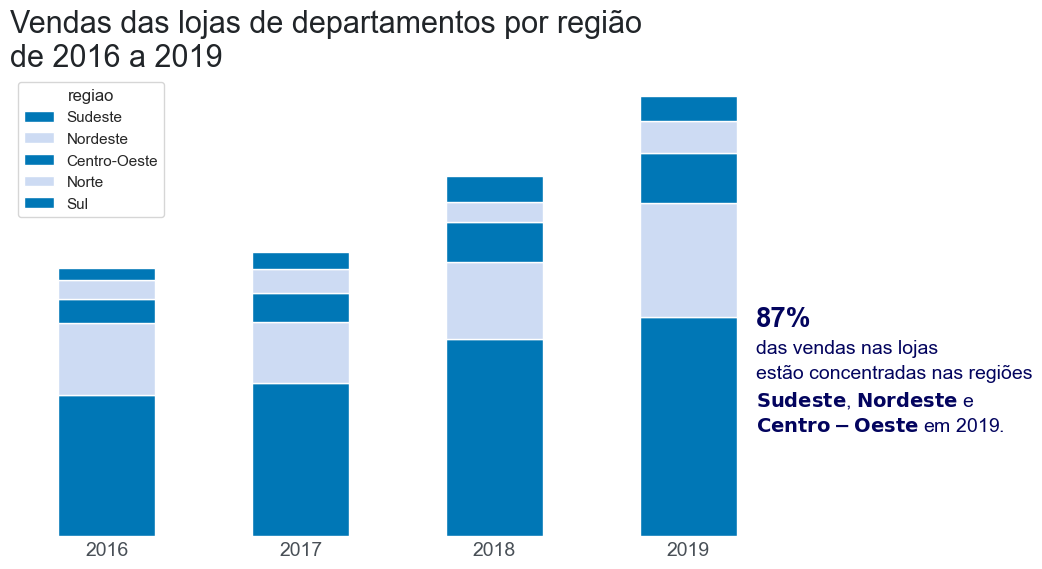

In [24]:
## Gerando a função para criar o gráfico de barras

def grafico_vendas_regiao():
  # Definindo as cores do gráfico
  cores = [AZUL2, AZUL3, AZUL4, CINZA3, CINZA4]

# Gerando o gráfico de colunas empilhadas 
ax = vendas_reg.plot(kind="bar", stacked=True, figsize=(10,6), color= cores)

# Personalizando o gráfico
ax.set_title('Vendas das lojas de departamentos por região\nde 2016 a 2019', loc='left', fontsize=22, color = CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2, rotation = 0)
ax.set_frame_on(False)

# remover todos os ticks do eixo x e y
ax.tick_params(axis="both", which="both", length=0)

# Anotando uma conclusão no gráfico
ax.text(3.35, 1.1e6, '87%', fontweight='bold', fontsize=20, color=AZUL1)
ax.text(3.35, 5.5e5,
        'das vendas nas lojas\n'
        'estão concentradas nas regiões\n'
        '$\\bf{Sudeste}$, $\\bf{Nordeste}$ e\n'
        '$\\bf{Centro-Oeste}$ em 2019.',
        fontsize=14,
        linespacing=1.45,
        color=AZUL1)
